In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
titanic_train = pd.read_csv('titanic-train.csv')
print(titanic_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
titanic_test = pd.read_csv('titanic-test.csv')
print(titanic_test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [4]:
titanic_combined = pd.concat([titanic_train, titanic_test], ignore_index=True)
print(titanic_combined.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [12]:
titanic_combined['Age'].fillna(titanic_combined['Age'].median(), inplace=True)
titanic_combined['Embarked'].fillna(titanic_combined['Embarked'].mode()[0], inplace=True)
titanic_combined['Fare'].fillna(titanic_combined['Fare'].mean(), inplace=True)


KeyError: 'Embarked'

In [ ]:
titanic_combined = pd.get_dummies(titanic_combined, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
titanic_train_processed = titanic_combined.iloc[:len(titanic_train)]
titanic_test_processed = titanic_combined.iloc[len(titanic_train):]
X_train = titanic_train_processed.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y_train = titanic_train_processed['Survived']
X_test = titanic_test_processed.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [8]:
from sklearn.decomposition import PCA
num_components = 2
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

D:\aldul\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\aldul\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\aldul\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\aldul\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse)

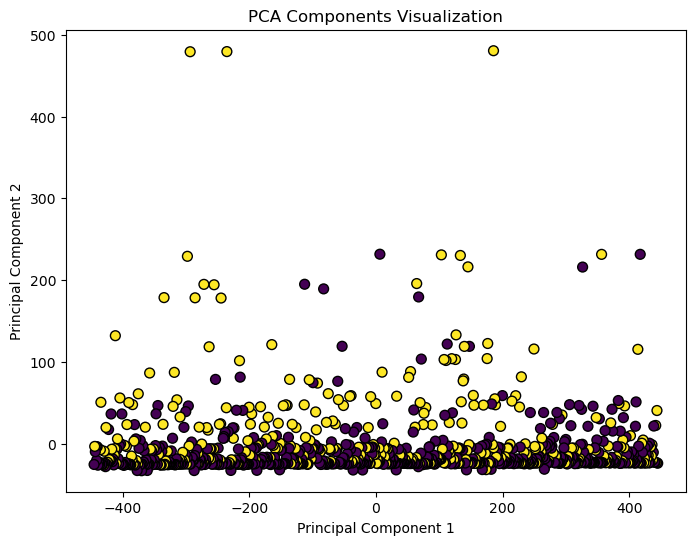

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=50)
plt.title('PCA Components Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [10]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

D:\aldul\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\aldul\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\aldul\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\aldul\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\aldul\Lib\site-packages\sklearn\utils\

SVC()

In [11]:
predictions = svc_model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Gridsearch Practice
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Use the grid model for predictions and evaluation
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

D:\aldul\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\aldul\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\aldul\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


NameError: name 'y_test' is not defined

In [ ]:
predictions = svc_model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the Titanic dataset
titanic_train = pd.read_csv('titanic-train.csv')
titanic_test = pd.read_csv('titanic-test.csv')

In [ ]:
# EDA - Explore the data
sns.pairplot(titanic_train, hue='Survived', palette='Dark2')

In [ ]:
# Create a kde plot of Age versus Fare for the survival classes
survived = titanic_train[titanic_train['Survived'] == 1]
sns.kdeplot(data=survived, x='Fare', y='Age', cmap="plasma", shade=True, shade_lowest=False)

In [ ]:
# Split the data into a training set and a testing set
X_train = titanic_train.drop('Survived', axis=1)
y_train = titanic_train['Survived']

In [ ]:
# Ensure that 'Survived' column is present in the testing set
if 'Survived' in titanic_test.columns:
    X_test = titanic_test.drop('Survived', axis=1)
    y_test = titanic_test['Survived']
else:
    X_test = titanic_test  # Adjust this based on the actual structure of your testing set
    y_test = None  # You may not have labels for the testing set

In [ ]:
# Train a Support Vector Machine Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)

In [ ]:
predictions = svc_model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


In [ ]:


# Gridsearch Practice
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Use the grid model for predictions and evaluation
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))